Import necessary python modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from operator import itemgetter
from matplotlib.ticker import MaxNLocator
from anthony_speech_lemmas import *

Import list of Anthony speech lemmas

In [3]:
speeches = speech_list

Group speeches by year

In [4]:
year_speeches = {}
for speech in speeches:
    year = speech["year"]
    if year not in year_speeches:
        year_speeches[year] = []
    year_speeches[year].append(speech)

Count word occurences for each year, excluding "nan" values

In [5]:
year_word_counts = {}
for year, speeches in year_speeches.items():
    word_counts = Counter()
    for speech in speeches:
        words = [word for word in speech["text"] if word != "nan"]
        word_counts.update(words)
    year_word_counts[year] = word_counts

Sum word occurences across all years

In [6]:
word_counts = Counter()
for year_counts in year_word_counts.values():
    word_counts += year_counts

Get and print top 5 words with most occurences

In [7]:
top_words = [word for word, count in word_counts.most_common(5)]
print(top_words)

['man', 'woman', 'law', 'shall', 'slave']


Create grouped bar graph

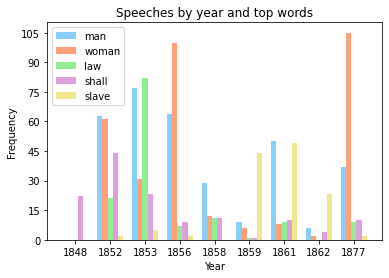

In [8]:
data = []
for i, word in enumerate(top_words):
    word_data = []
    for year, word_counts in year_word_counts.items():
        count = word_counts.get(word, 0)
        word_data.append(count)
    data.append(word_data)

bar_width = 0.15
year_labels = list(year_word_counts.keys())
x = np.arange(len(year_labels))
fig, ax = plt.subplots()
colors = ['lightskyblue', 'lightsalmon', 'lightgreen', 'plum', 'khaki']
for i, word_data in enumerate(data):
    ax.bar(x - (2 - i) * bar_width, word_data, bar_width, label=top_words[i], color=colors[i])


# Set the x-axis tick locations and labels
ax.set_xticks(range(len(year_labels)))
ax.set_xticklabels([int(year) for year in year_labels])

# Set the y-axis tick locations and labels
ymin, ymax = ax.get_ylim()
yrange = ymax - ymin
ax.yaxis.set_major_locator(MaxNLocator(integer=True, prune='upper'))
yticks = ax.get_yticks()
yticks_int = np.linspace(yticks[0], yticks[-1], len(yticks), dtype=int)
yticks_int = [y for y in yticks_int if ymin <= y <= ymax]
ax.set_yticks(yticks_int)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Speeches by year and top words')

plt.show()